# **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

In [3]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage import io 
from skimage.transform import rescale



Pretty printing has been turned ON


## 5.1 Morphological operations 

**Q.1** Using morphological operations functions build in skimage [`morphology module`](http://scikit-image.org/docs/dev/api/skimage.morphology.html) and structuring element of [`disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) apply **erosion, dilation, opening and closing** morphological operations on `FindingContours.png` image, using disk ratio of $r \in [1, 10, 20]$

**Note** use io.imshow to show the image rather than plt.

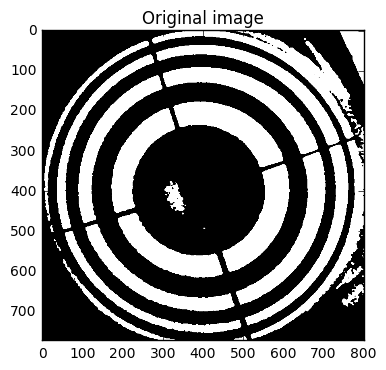

In [8]:
# Load the image 
filepath = "./images/FindingContours.png"
Im = io.imread(filepath)

#Disk ratio
r1 = 1
r2 = 10
r3 = 20

# Display the original image
plt.figure
plt.imshow(Im, cmap=cm.gray)
plt.title('Original image')
plt.show()




** Q.1.1 Erosion**

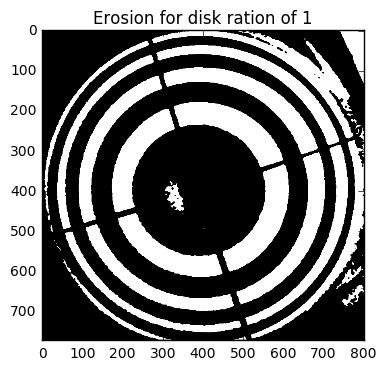

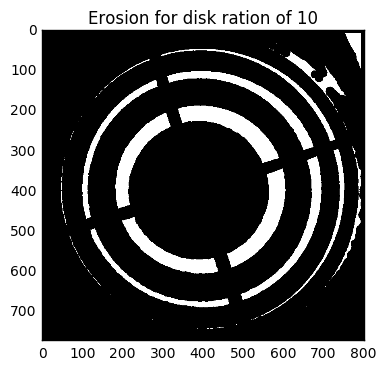

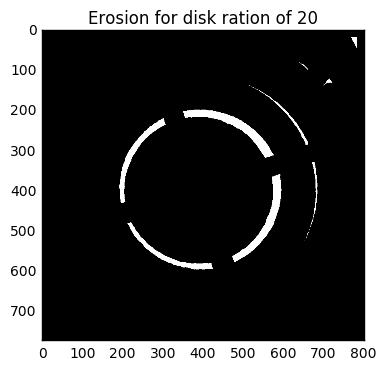

In [9]:
#library needed
from skimage.morphology import binary_erosion
from skimage.morphology import disk

img1 = binary_erosion(Im, disk(r1))
plt.figure
plt.imshow(img1, cmap = cm.gray)
plt.title('Erosion for disk ration of 1')
plt.show()

img2 = binary_erosion(Im, disk(r2))
plt.figure
plt.imshow(img2, cmap = cm.gray)
plt.title('Erosion for disk ration of 10')
plt.show()

img3 = binary_erosion(Im, disk(r3))
plt.figure
plt.imshow(img3, cmap = cm.gray)
plt.title('Erosion for disk ration of 20')
plt.show()

** Q.1.2 Dilation **

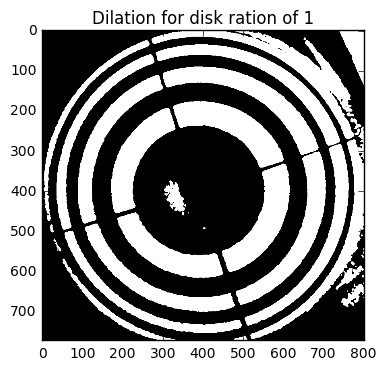

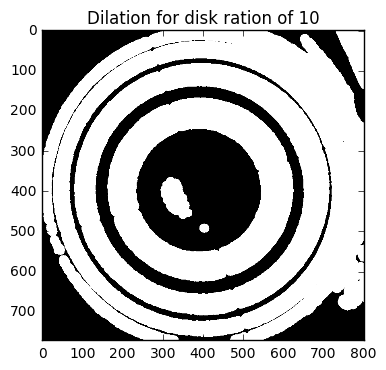

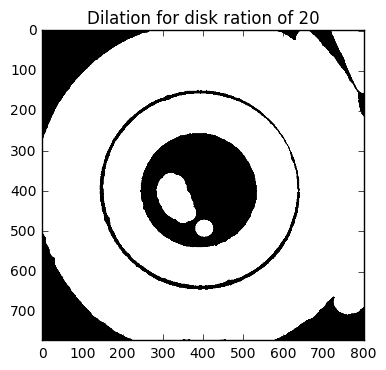

In [10]:
from skimage.morphology import binary_dilation


img11 = binary_dilation(Im, disk(r1))
plt.figure
plt.imshow(img11, cmap = cm.gray)
plt.title('Dilation for disk ration of 1')
plt.show()

img21 = binary_dilation(Im, disk(r2))
plt.figure
plt.imshow(img21, cmap = cm.gray)
plt.title('Dilation for disk ration of 10')
plt.show()

img31 = binary_dilation(Im, disk(r3))
plt.figure
plt.imshow(img31, cmap = cm.gray)
plt.title('Dilation for disk ration of 20')
plt.show()

** Q.1.3 Opening **

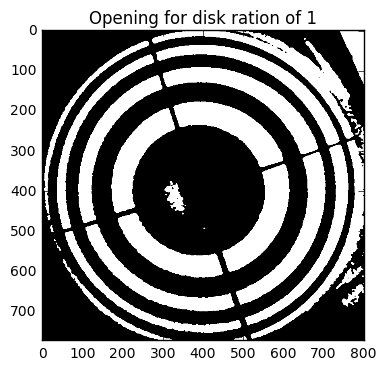

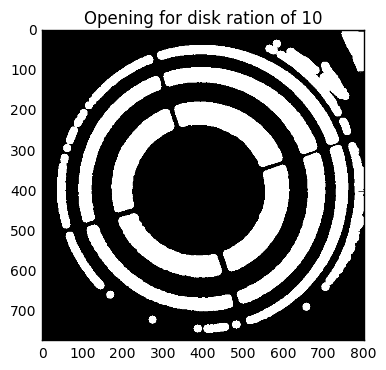

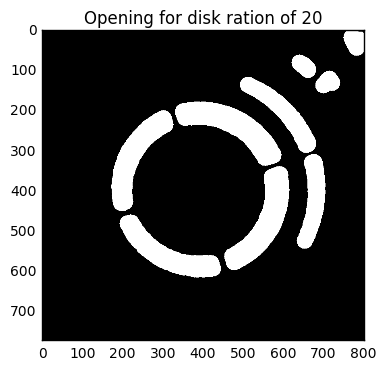

In [11]:
from skimage.morphology import binary_opening


img12 = binary_opening(Im, disk(r1))
plt.figure
plt.imshow(img12, cmap = cm.gray)
plt.title('Opening for disk ration of 1')
plt.show()

img22 = binary_opening(Im, disk(r2))
plt.figure
plt.imshow(img22, cmap = cm.gray)
plt.title('Opening for disk ration of 10')
plt.show()

img32 = binary_opening(Im, disk(r3))
plt.figure
plt.imshow(img32, cmap = cm.gray)
plt.title('Opening for disk ration of 20')
plt.show()


** Q.1.4 Closing**

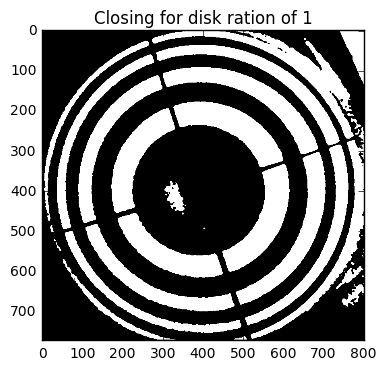

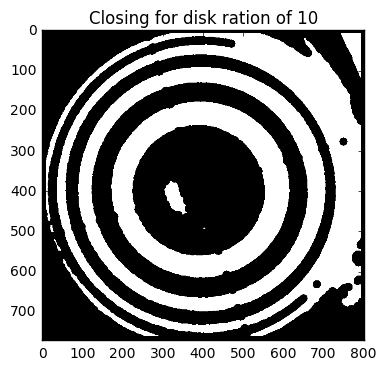

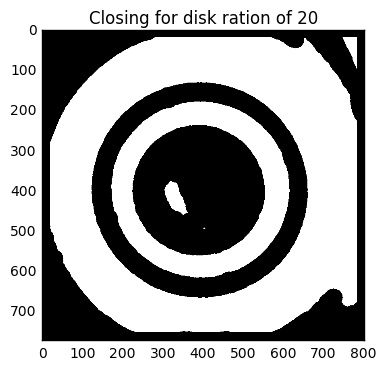

In [12]:
from skimage.morphology import binary_closing


img13 = binary_closing(Im, disk(r1))
plt.figure
plt.imshow(img13, cmap = cm.gray)
plt.title('Closing for disk ration of 1')
plt.show()

img23 = binary_closing(Im, disk(r2))
plt.figure
plt.imshow(img23, cmap = cm.gray)
plt.title('Closing for disk ration of 10')
plt.show()

img33 = binary_closing(Im, disk(r3))
plt.figure
plt.imshow(img33, cmap = cm.gray)
plt.title('Closing for disk ration of 20')
plt.show()

** Q.2 ** Explain what is the difference between erosion, dilation, opening and closing ? 

In [ ]:
# The difference between all this morphological operation is that the erosion will have a effect of deleting the white cicle 
# while the dilation will have a effect of incresing those white circle.
# The opening operator is a mix between erosion and dilation it remove the black circle and improve the white circle.
# And finally for the closing we will have the operation of dilation in the first time the white circle will increase 
# which will have an effect on the  black circle which will decrease.

## 5.2 segmentation

### 5.2.1  Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore: 

**1-** read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

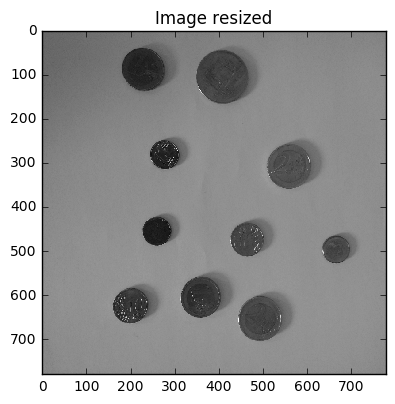

In [14]:
# Load the image
filepath1 = "./images/coins.jpg"
Image2 = io.imread(filepath1)

#read the image as ubyte
Coins = img_as_ubyte(Image2)

# divide the scale of the image by a factor of 4
from skimage.transform import rescale
Coins2  = rescale(Coins, 0.25)

#convert the image to gray
coins_gray = rgb2gray(Coins2)

#Display the image
plt.figure
io.imshow(coins_gray)
plt.title('Image resized')
plt.show()


**2-** Threshold the image using a global Otsu's thresholding (check `skimage.filters`) after converting the image into gray scale. Display the thresholded image.

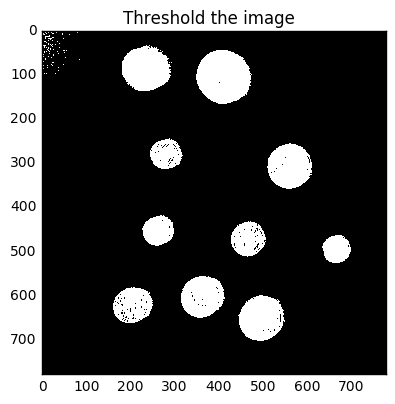

In [17]:
# import the library needed
from skimage.filters import threshold_otsu

# using the threshold on the image
Tcoins = threshold_otsu(coins_gray)

# Display the threshold image
plt.figure
io.imshow(coins_gray<Tcoins)
plt.title('Threshold the image  ')
plt.show()


**3-** Clean the  thresholded image using some morphological operations, i.e. erosion, dilation, opening, closing ...

<function matplotlib.pyplot.show>

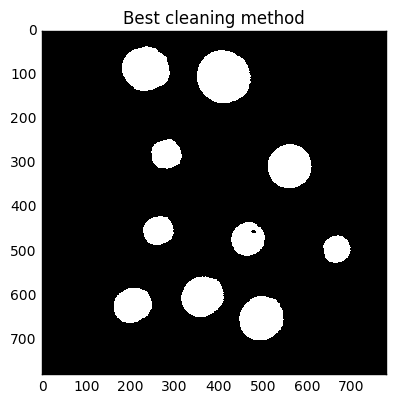

In [18]:
# Clean the top left corner of the threshold
clean_ope = binary_opening(coins_gray<Tcoins, disk(r1))
clean_ope_dil = binary_dilation(clean_ope, disk(3))
clean_ope_dil_ero = binary_erosion(clean_ope_dil, disk(4))


#Plotting the figure
plt.figure
io.imshow(clean_ope_dil_ero)
plt.title('Best cleaning method')
plt.show

#----------------------Comment-----------------------------------------------------------------------------
# The best morphological operations used to clean the noise in the top left corner of the threshold image
# is the combination of the opening operation follow by the dilation and finalize with the erosion.

**4-** Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image using `circle_perimeter` from `skimage.draw`


C:\Users\Selma\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


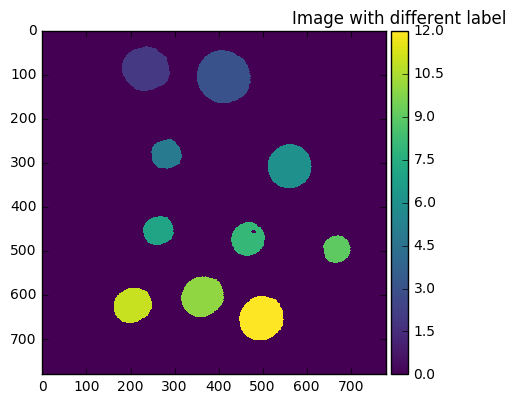

TypeError: unorderable types: _RegionProperties() <= _RegionProperties()

In [22]:
# image with different label 
from skimage.measure import label
clean_ope_dil_ero = binary_erosion(clean_ope_dil, disk(4))
#1
lab = label(clean_ope_dil_ero)
plt.figure
io.imshow(lab)
plt.title('Image with different label')
plt.show()

#2
from skimage.measure import regionprops
intensity_image=None
label_img = label(lab, connectivity=lab.ndim)
props = regionprops(label_img)
#region = regionprops(lab)
plt.figure
io.imshow(props)
plt.show()

from skimage import data, util

#img = util.img_as_ubyte(data.coins()) > 110

#3
from skimage.draw import circle_perimeter


### 5.2.2 Segmentation of markers

**Q.3** Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 